In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def get_dft(x):
    """
    Return the non-redundant real/imaginary components
    of the DFT, expressed as amplitudes of sines/cosines
    involved
    
    Parameters
    ----------
    x: ndarray(N)
        A signal
    
    Returns
    -------
    cos_sum: ndarray(ceil(N/2)), sin_sums(ndarray(ceil(N/2)))
        DFT cosine/sine amplitudes
    """
    N = len(x)
    t = np.linspace(0, 1, N+1)[0:N]
    n_freqs = int(np.ceil(N/2))
    f = np.fft.fft(x)
    cos_sums = np.real(f)[0:n_freqs]/(N/2)
    sin_sums = -np.imag(f)[0:n_freqs]/(N/2)
    return cos_sums, sin_sums


In [7]:
def time_shift_square_anim(N, max_freq_index, n_shifts, f):
    """
    Create an animation of a time shifting by one period
    of a square wave, while plotting its cosine/sine components
    of the discrete Fourier Transform, as well as the associated 
    amplitudes/phases
    
    Parameters
    ----------
    N: int
        Number of samples to take in the square wave
    max_freq_index: int
        Maximum frequency index to show in the plots
    n_shifts: int
        Number of time shifts to show in the animation
    f: int
        Frequency of the sinusoid, in units of cycles per
        interval N
    """
    t = np.linspace(0, 1, N+1)[0:N]
    plt.figure(figsize=(16, 8))
    for i, shift in enumerate(np.linspace(0, 1/f, n_shifts)):
        x = np.sign(np.sin(2*np.pi*f*(t-shift)))
        c, s = get_dft(x)
        amps = np.sqrt(c**2+s**2)
        phases = np.arctan2(s, c)
        plt.clf()
        plt.subplot2grid((2, 4), (0, 0), rowspan=1, colspan=4)
        plt.plot(t, x)
        plt.ylim([-1.1, 1.1])
        plt.title("square$(2 \pi {} (t - {:.3f}))$".format(f, shift))
        plt.subplot(245)
        plt.stem(c[0:max_freq_index+2])
        plt.xlabel("Frequency Index")
        plt.ylabel("Dot Product")
        plt.title("Cosines")
        plt.ylim([-4/np.pi-0.1, 4/np.pi+0.1])
        plt.yticks([-4/np.pi, 0, 4/np.pi], ["$-4/\\pi$", "0", "$4/\\pi$"])
        plt.xlim([-0.5, max_freq_index+0.5])
        plt.subplot(246)
        plt.stem(s[0:max_freq_index+2])
        plt.xlabel("Frequency Index")
        plt.ylabel("Dot Product")
        plt.title("Sines")
        plt.ylim([-4/np.pi-0.1, 4/np.pi+0.1])
        plt.yticks([-4/np.pi, 0, 4/np.pi], ["$-4/\\pi$", "0", "$4/\\pi$"])
        plt.xlim([-0.5, max_freq_index+0.5])
        plt.subplot(247)
        plt.stem(amps[0:max_freq_index+2])
        plt.xlabel("Frequency Index")
        plt.ylabel("Dot Product")
        plt.title("Amplitudes")
        plt.ylim([0, 4/np.pi+0.1])
        plt.yticks([0, 4/np.pi/3, 4/np.pi/5, 4/np.pi/7, 4/np.pi], ["0", "$(4/\\pi)/3$", "$(4/\\pi)/5$", "$(4/\\pi)/7$", "$4/\\pi$"])
        plt.xlim([-0.5, max_freq_index+0.5])
        plt.grid(linestyle='--', linewidth=2, axis='y')
        plt.subplot(248)
        plt.stem((amps[0:max_freq_index+2]>1e-3)*phases[0:max_freq_index+2])
        plt.xlim([-0.5, max_freq_index+0.5])
        plt.ylim([-np.pi-0.1, np.pi+0.1])
        plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ["$-\\pi$", "$\\pi/2$", "0", "$\\pi/2$", "$\\pi$"])
        plt.xlabel("Frequency Index")
        plt.ylabel("Dot Product")
        plt.title("Phase")
        plt.tight_layout()
        plt.savefig("{}.png".format(i), bbox_inches='tight', facecolor='white', transparent=False)

KeyboardInterrupt: 

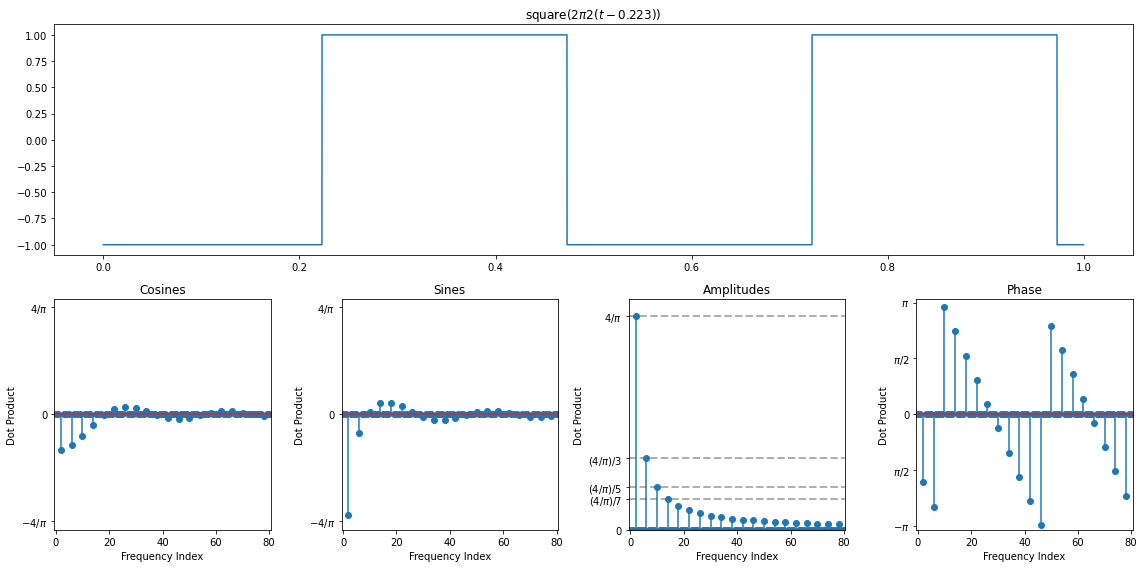

In [8]:
time_shift_square_anim(100000, 80, 500*6, 2)